# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

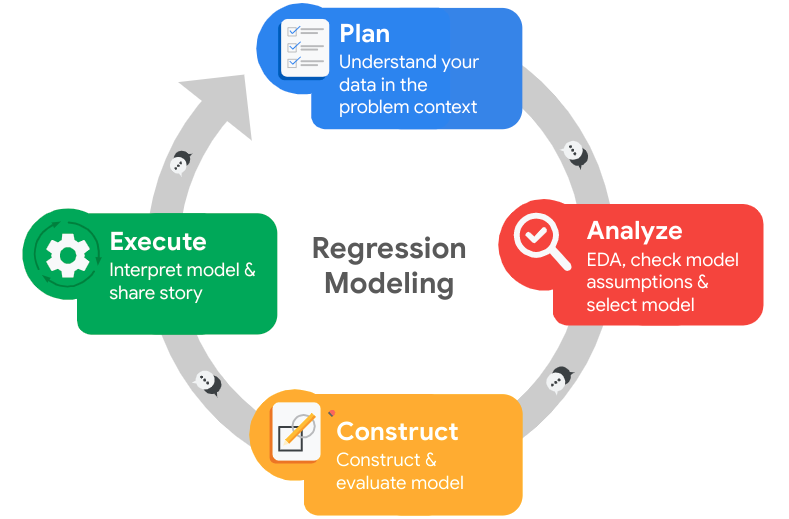



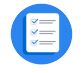

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [51]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns= {'number_project': 'number_of_projects', 'average_montly_hours': 'avg_monthly_hours',
                     'time_spend_company': 'years_at_company', 'Work_accident': 'work_accident', 'left': 'churned',
                     'promotion_last_5years': 'promotion', 'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'work_accident', 'churned',
       'promotion', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level    0
last_evaluation       0
number_of_projects    0
avg_monthly_hours     0
years_at_company      0
work_accident         0
churned               0
promotion             0
department            0
salary                0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.tail()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
#df0.drop_duplicates(inplace=True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
#df0.head()

### Check outliers

Check for outliers in the data.

C:\Users\Junior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years_at_company'>

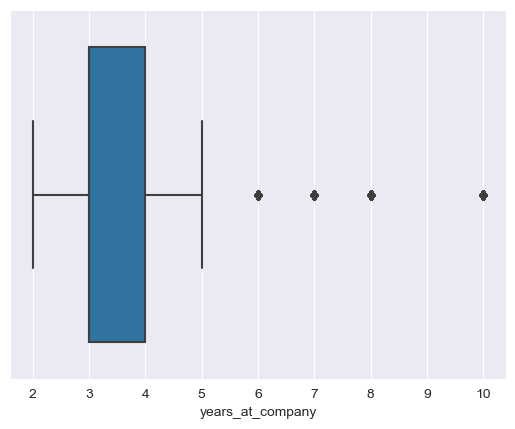

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df0['years_at_company'])

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df0['years_at_company'].quantile(0.25)
percentile75 = df0['years_at_company'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

outs = df0.loc[df0['years_at_company'] > upper_limit, 'years_at_company']
print(len(outs))
print(outs.unique())

1282
[ 6  8 10  7]


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

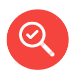
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




There were a few interesting observations I came across in the data. Firstly, most employees (50%) had average satisfaction level, and pretty much fell average on every other metric as well. The variable that stood out most to me was the number of hours being worked by the employees. The average number of hours being worked by employees was around 201 hours for the month, that is around 40 more hours than the average 40hr work week. In fact only about 25% of employees were working around 40hr per month. Even more concerning was the max number of hours being worked at 310 hours for the month, almost double than the average work week of 40hrs. Another variable that stood out to me was the number of projects that an employee was contributing to. The average being around 4 project per employee, but the max number of project that an employee took on was 7 which seems high. These to features may be a key to finding the churn rate of an employee.

One question I had looking at the data was the number of duplicates that showed. I believe the duplicates found are not acutal duplicated and just employees with similar responses and work descriptions. Looking to outliers I found there were around 1300 employees that had a longer tenure at the company than most. These employes look to have been around from 6-10 years. It may be interesting to take a look at these employees responses and see if we can find insights as to the reasons they have stayed longer than the others. 

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [13]:
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


C:\Users\Junior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction_level'>

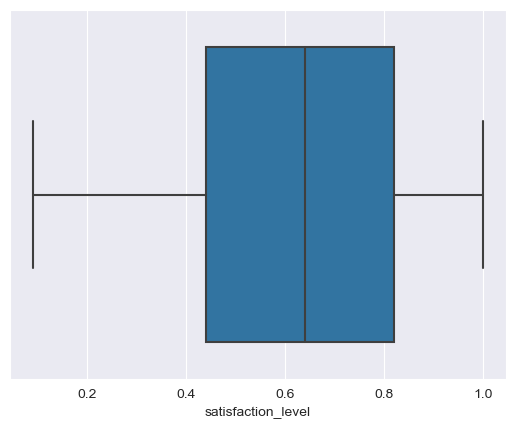

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(df0['satisfaction_level'])

The mean of satisfaction level is around average, with the IQR ranging from .4 to .8

<AxesSubplot:>

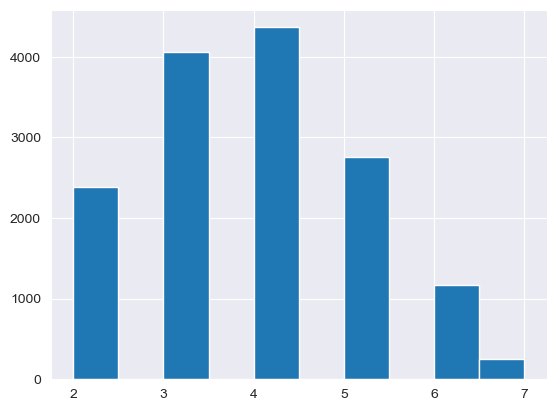

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
df0['number_of_projects'].hist()

The number of projects seem to be normally distributed. Most employees look to take on around 4 projects.

C:\Users\Junior\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_monthly_hours'>

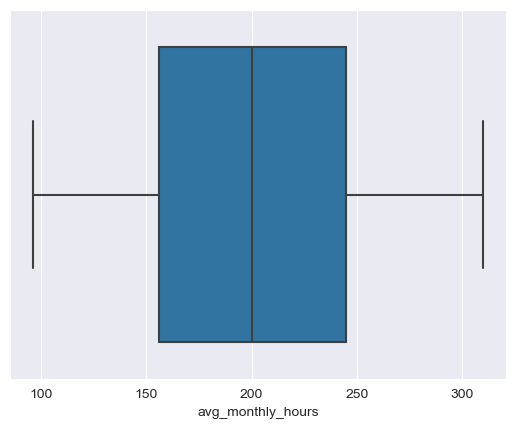

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(df0['avg_monthly_hours'])

The median of the average monthly hours worked by employees is 200 hours which is more than 40 hours a week. The IQR ranges from  ~ 160 hours to 240 hours. 

<AxesSubplot:>

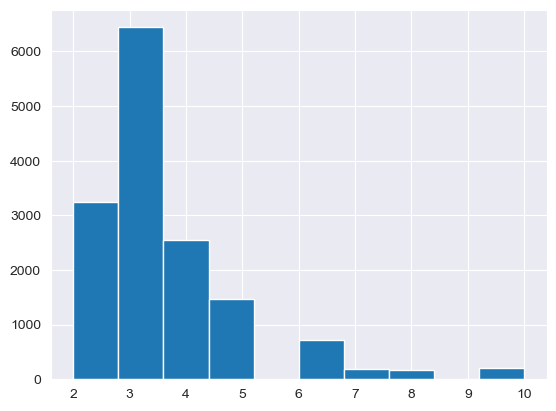

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
df0['years_at_company'].hist()

Most employees are leaving right around 3 years being at the company.

[Text(0, 0, '14680'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '319')]

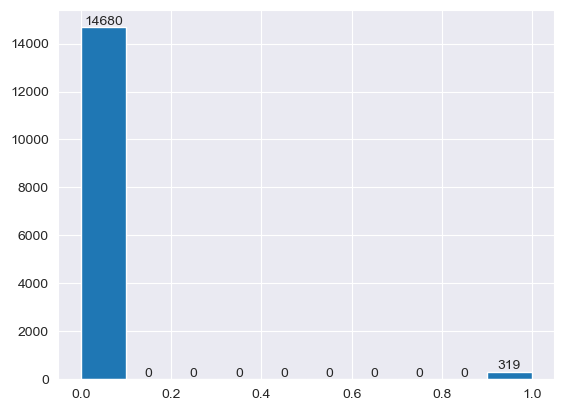

In [18]:
counts, edges, bars = plt.hist(df0['promotion'])
plt.bar_label(bars)

This is very intriguing, there a very few promotions among the employees. A significant amount of employees are not getting promoted. Only 319 out of 14999 employees have been promoted.

In [19]:
# lets take a look at the employees who are working more than an average of 40 hrs a week, that would be 160 hours in a month
# and compare them to employees who are working more than 40 hrs a week or 160 hours in a month.
# This will be a feature that will be engineered

more_than_forty = df0[df0['avg_monthly_hours'] > 160]
less_than_forty = df0[df0['avg_monthly_hours'] <= 160]

In [20]:
# balance of employees who work less than 40 hours a week compared to those who do
# 1 for employees who DO work more than 40 hours a week and 0 for employees who DO NOT.

balance = np.where(df0['avg_monthly_hours'] > 160, 1, 0)
balance = pd.Series(balance)
balance.value_counts(normalize=True)

1    0.710647
0    0.289353
dtype: float64

From the data it looks like 71% of employees work more than 40 hours a week whil about 29% of employees do not. Obviously there is going to be positions that are part-time. But this may be a reason for an employee leaving.

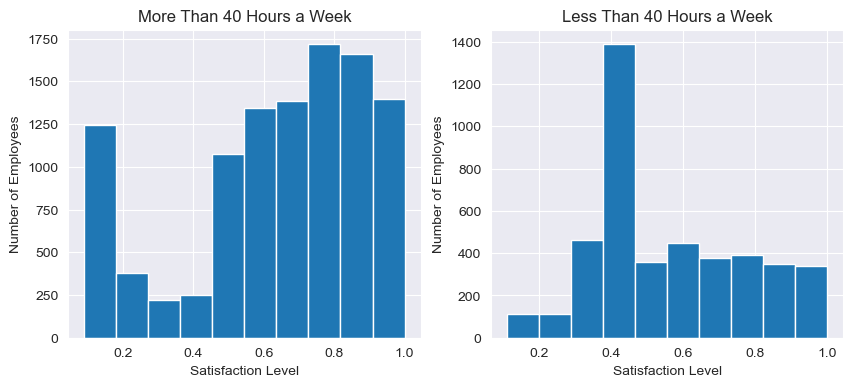

In [21]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

more_than_forty['satisfaction_level'].hist(ax=axes[0])
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('More Than 40 Hours a Week')

less_than_forty['satisfaction_level'].hist(ax=axes[1])
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Less Than 40 Hours a Week')
plt.show()

Comparing employees who work less than 40 hours on average a week to those who work more seem to be less satisfied.

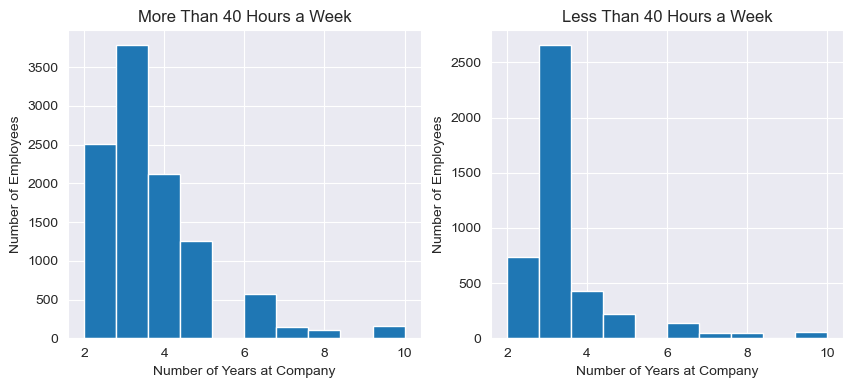

In [22]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

more_than_forty['years_at_company'].hist(ax=axes[0])
axes[0].set_xlabel('Number of Years at Company')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('More Than 40 Hours a Week')

less_than_forty['years_at_company'].hist(ax=axes[1])
axes[1].set_xlabel('Number of Years at Company')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Less Than 40 Hours a Week')
plt.show()

It is not significant but it is noticable that the employees who work less than 40 are also less prone to stay longer than 3 years.

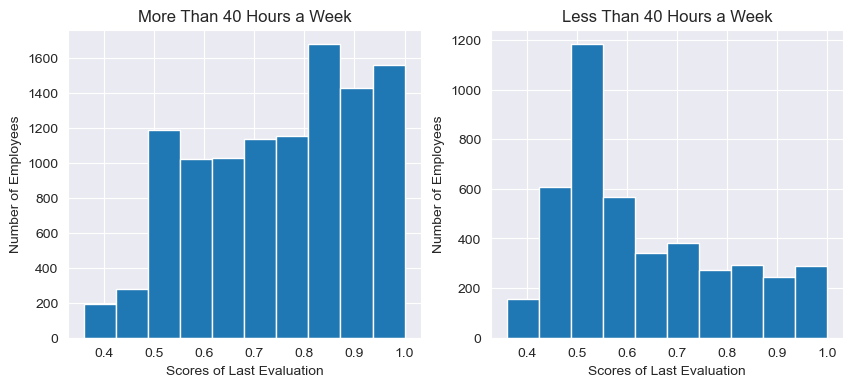

In [23]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

more_than_forty['last_evaluation'].hist(ax=axes[0])
axes[0].set_xlabel('Scores of Last Evaluation')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('More Than 40 Hours a Week')

less_than_forty['last_evaluation'].hist(ax=axes[1])
axes[1].set_xlabel('Scores of Last Evaluation')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Less Than 40 Hours a Week')
plt.show()

The scores of employees last evaluation who work less than 40 hours a week are significantly lower.

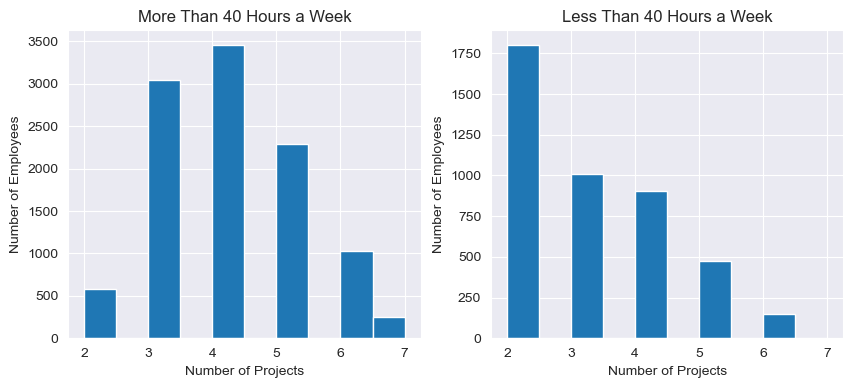

In [24]:
fig, axes = plt.subplots(1, 2, figsize= (10, 4))

more_than_forty['number_of_projects'].hist(ax=axes[0])
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Number of Employees')
axes[0].set_title('More Than 40 Hours a Week')

less_than_forty['number_of_projects'].hist(ax=axes[1])
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Less Than 40 Hours a Week')
plt.show()

The number of projects that employees who work more than 40 hours a week contribute on have a normal distribution which is a similar distribution for the entire dataset. The number of projects that employees who work more than 40 hours a week contribute to have an inverse relationship. This shows that employees who work 40 hours a week OR LESS work on less projects, this could be due to new employees or some other variable.

**Another reason for this is simply cause and effect. The more projects that an employee takes on the more hours they are going to work. **

In [25]:
more_than_forty['promotion'].value_counts()

0    10430
1      229
Name: promotion, dtype: int64

In [26]:
less_than_forty['promotion'].value_counts()

0    4250
1      90
Name: promotion, dtype: int64

For both employees who work more than 40 hours or less than 40 hours the promotion rate is less than 1% this may also be a key
indicator as to why employees leave.

In [27]:
## lets take a look at promotions and if theres is any correlations to tenure at the company.
# there is a clear seperation of tenure outliers starting at 6 years with the company. I want to see if there are
# more promotions handed out to employees who are there longer than 5 years.
more_than_five = df0[df0['years_at_company'] > 5]
more_than_five['promotion'].value_counts(normalize=True)

0    0.938378
1    0.061622
Name: promotion, dtype: float64

Promotions are not any more significant to employees who are there for more than 5 years.

In [28]:
df0['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [29]:
more_than_forty['department'].value_counts()

sales          2916
technical      1966
support        1570
IT              912
product_mng     621
marketing       597
RandD           579
accounting      525
hr              494
management      479
Name: department, dtype: int64

In [30]:
less_than_forty['department'].value_counts()

sales          1224
technical       754
support         659
IT              315
product_mng     281
marketing       261
hr              245
accounting      242
RandD           208
management      151
Name: department, dtype: int64

Each department seem to have the same spread of employees that work more than 40 hours a week and less than 40 hours a week. Showing that generally one department does not work more than the other, with the exception of the HR and R&D department.

In [31]:
pd.pivot_table(df0, index= 'department', values=['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company']).sort_values(by='avg_monthly_hours',ascending=False)

,avg_monthly_hours,last_evaluation,number_of_projects,satisfaction_level,years_at_company
department,,,,,
technical,202.497426,0.721099,3.877941,0.607897,3.411397
IT,202.215974,0.716830,3.816626,0.618142,3.468623
management,201.249206,0.724000,3.860317,0.621349,4.303175
accounting,201.162973,0.717718,3.825293,0.582151,3.522816
sales,200.911353,0.709717,3.776329,0.614447,3.534058
RandD,200.800508,0.712122,3.853875,0.619822,3.367217
support,200.758188,0.723109,3.803948,0.618300,3.393001
product_mng,199.965632,0.714756,3.807095,0.619634,3.475610
marketing,199.385781,0.715886,3.687646,0.618601,3.569930


In [32]:
pd.pivot_table(df0, index= 'salary', values=['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company']).sort_values(by='avg_monthly_hours', ascending=False)

,avg_monthly_hours,last_evaluation,number_of_projects,satisfaction_level,years_at_company
salary,,,,,
medium,201.338349,0.717322,3.813528,0.621817,3.529010
low,200.996583,0.717017,3.799891,0.600753,3.438218
high,199.867421,0.704325,3.767179,0.637470,3.692805


In [33]:
pd.pivot_table(df0, index= ['years_at_company', 'number_of_projects'], values=['last_evaluation', 'satisfaction_level', 'avg_monthly_hours'])

avg_monthly_hours  last_evaluation  \
years_at_company number_of_projects                                       
2                2                          188.062500         0.659018   
                 3                          197.811155         0.715944   
                 4                          202.888986         0.727596   
                 5                          205.534296         0.727545   
                 6                          192.818182         0.694697   
                 7                          156.000000         0.470000   
3                2                          152.104099         0.539606   
                 3                          197.047138         0.715808   
                 4                          202.107341         0.725840   
                 5                          205.424942         0.728545   
                 6                          194.198529         0.680662   
                 7                          234.142857         0.574286   
4                2                          192.220588         0.698456   
                 3                          198.884906         0.731189   
                 4                          202.816291         0.718527   
                 5                          204.006961         0.734362   
                 6                          261.239227         0.839807   
                 7                          281.228571         0.879905   
5                2                          186.518072         0.699759   
                 3                          192.414815         0.708593   
                 4                          225.532584         0.834270   
                 5                          230.386824         0.857044   
                 6                          224.538889         0.752111   
                 7                          258.500000         0.810263   
6                2                          192.075472         0.620943   
                 3                          200.438849         0.700216   
                 4                          215.372093         0.791488   
                 5                          220.160714         0.808080   
                 6                          213.689655         0.696322   
7                2                          194.375000         0.575000   
                 3                          195.827586         0.667931   
                 4                          200.500000         0.704375   
                 5                          208.000000         0.698421   
                 6                          211.333333         0.733333   
8                2                          162.500000         0.610000   
                 3                          203.032258         0.704516   
                 4                          177.304348         0.745652   
                 5                          213.470588         0.684118   
                 6                          180.500000         0.847500   
10               2                          190.800000         0.704000   
                 3                          194.787234         0.730638   
                 4                          199.789474         0.754211   
                 5                          224.727273         0.692727   
                 6                          190.666667         0.688333   

                                     satisfaction_level  
years_at_company number_of_projects                      
2                2                             0.605937  
                 3                             0.702924  
                 4                             0.711337  
                 5                             0.713556  
                 6                             0.510303  
                 7                             0.660000  
3                2                             0.444256  
                 3                             0.707026  
      

Taking a look at the years and number of projects an employees contributes too, there is in interested correlation. Noticable is the satisfaction level and evaluation scores is the highest on average no matter how long an employees has been with the company when the employee is contributing to 4-5 projects, more than that both satisfaction and evaluation score drop, satisfaction more so. However, in certain cases, such as employees who have been at the company for 4-6 years their evaluation score normally increase but their satisfaction again decreases. It is also observed that employees who have been with the company 3-5 years have the lowest satisfaction levels, taking on 6-7 projects, of .1.-2.

In [34]:
scratch = df0.copy()
scratch['more_than_forty'] = np.where(df0['avg_monthly_hours'] > 160, 1, 0)
pd.pivot_table(scratch, index=['more_than_forty'], values=['last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company'])

,last_evaluation,number_of_projects,satisfaction_level,years_at_company
more_than_forty,,,,
0,0.631205,3.117512,0.561147,3.321889
1,0.750669,4.082184,0.633878,3.570035


Taking a quick look at employees who work more than forty hours a week compared to those who work more, again it is interesting to see that those who work more score higher on their evaluations and have a higher satisfaction level.

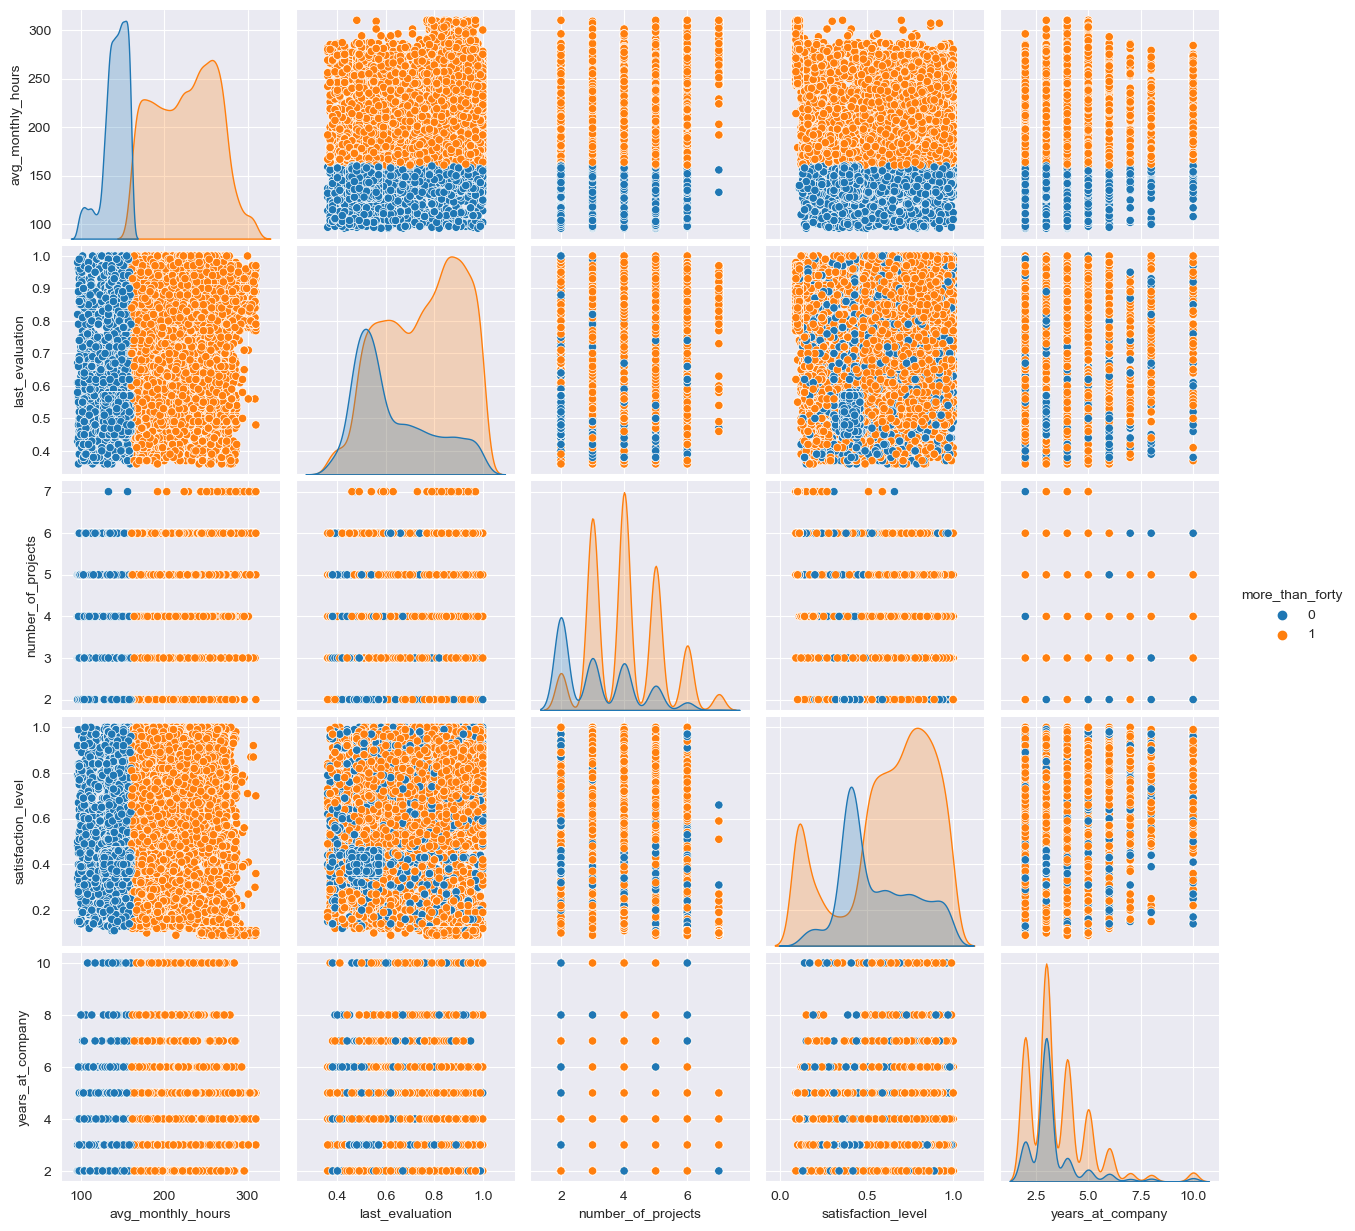

In [35]:
df_pair = scratch[['avg_monthly_hours', 'last_evaluation', 'number_of_projects', 'satisfaction_level', 'years_at_company', 'more_than_forty']]
sns.pairplot(df_pair, hue='more_than_forty')

Not much can be gathered from this pair wise plot. This seperation shows there is significantly more employees who work more than 40 hours a week.

In [36]:
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Feature Engineering

In [37]:
# Features to engineer - less than forty hour work week (binary)
# we know from earlier analysis that employees who work less than 40 hours a week are less satisfied.
df0['less_than_forty'] = np.where(df0['avg_monthly_hours'] <= 160, 1, 0)
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,department,salary,less_than_forty
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


## Variable Encoding

In [38]:
# encode categorical variables so we can look at a heatmap correlation and prep for model construction.

df = pd.get_dummies(df0)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,less_than_forty,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
df.corr()

,satisfaction_level,last_evaluation,number_of_projects,avg_monthly_hours,years_at_company,work_accident,churned,promotion,less_than_forty,department_IT,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.132654,0.006373,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.316495,0.001269,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
number_of_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.354908,0.003287,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
avg_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.767246,0.006967,...,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
years_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.077067,-0.006053,...,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.022409,-0.009293,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
churned,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.186661,-0.010925,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.002347,-0.038942,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
less_than_forty,-0.132654,-0.316495,-0.354908,-0.767246,-0.077067,-0.022409,0.186661,-0.002347,1.000000,-0.021478,...,0.021173,-0.022936,0.008063,0.012371,0.008578,0.005800,-0.012607,-0.027221,0.026207,-0.011336
department_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,-0.021478,1.000000,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775


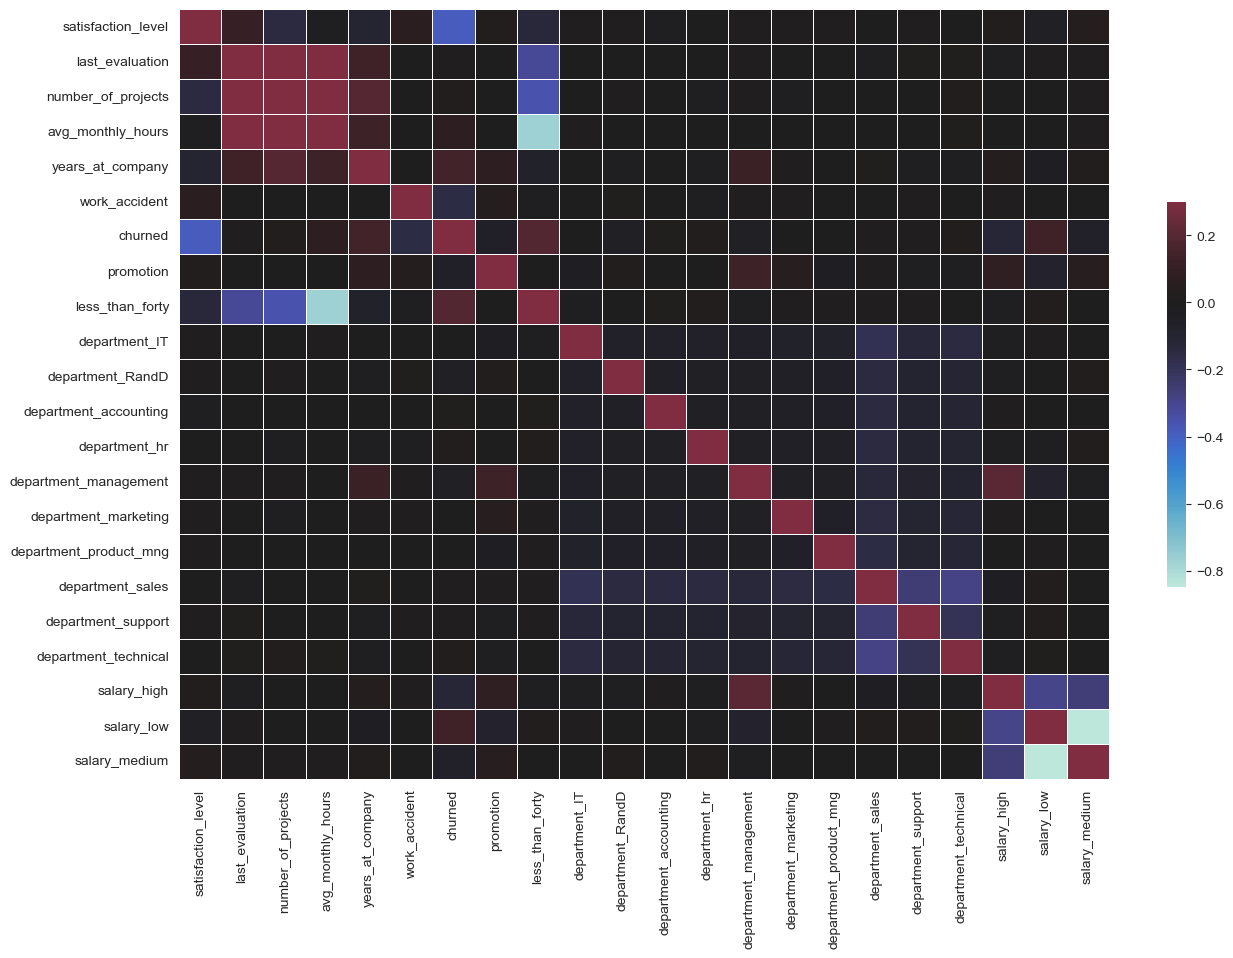

In [40]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(df.corr(method='pearson'), vmax=.3, center=0, cmap='icefire', linewidths=.5, cbar_kws={'shrink': 0.5})

Examining the heatmap we can validate some clear correlations that we noted earlier as well as some clear inverse correlations.

In [41]:
# we can take note here of variables that will be of interest and variables that are useless to our target variable of churn rate.
# drop 'last_evaluation', 'number_of_projects', 'work_accident',all departments, 'salary_high', 'salary_medium'

In [42]:
df = df[['churned', 'satisfaction_level', 'avg_monthly_hours', 'years_at_company', 'promotion', 'less_than_forty', 'salary_low', 'salary_medium', 'salary_high']]
df.head()

,churned,satisfaction_level,avg_monthly_hours,years_at_company,promotion,less_than_forty,salary_low,salary_medium,salary_high
0,1,0.38,157,3,0,1,1,0,0
1,1,0.80,262,6,0,0,0,1,0
2,1,0.11,272,4,0,0,0,1,0
3,1,0.72,223,5,0,0,1,0,0
4,1,0.37,159,3,0,1,1,0,0


In [43]:
# take a look at churn balance
df['churned'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: churned, dtype: float64

In [47]:
# lets drop outliers for employees who have been with the company 6 years or longer since most employees who quit leave before 6 years.
df_subset = df[df['years_at_company'] < 6]
df_subset['years_at_company'].unique()

array([3, 4, 5, 2], dtype=int64)

The balance of the target variable is not well balanced but enough to work with.

### Insights

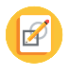
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Logistic Regression Model

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Since the prediction task is to predict whether or not an employee will quit, the target variable is the churn column.

### Identify the types of models most appropriate for this task.

The most appropriate models for this predict task are classification models, more specifically a binary classification. For this task I want to implement two different models, a logisitc regression model and a ensemble model, in this case a Random Forest Classifier. I decided to choose these two models because Salisfort Motors is looking for as much (clarity) on the reason why an employee leaves. These two models can help explain and show exactly what features are most impactful to the models.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [123]:
X = df_subset.drop('churned', axis=1)
y = df_subset['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [124]:
### YOUR CODE HERE ###
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Junior\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Since there is a convergence warning on the model, lets try to normalize the data and see if we can fix this issue.

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [90]:
clf.fit(X_train, y_train)

LogisticRegression()

Now there is no warning with the data scaled. This means that there was a convergence of the algo.

In [95]:
clf.coef_

array([[-0.91114835,  1.60089313,  1.08657419, -0.15759881,  2.1403518 ,
         0.19012634, -0.03567644, -0.28971128]])

In [68]:
X.head()

,satisfaction_level,avg_monthly_hours,years_at_company,promotion,less_than_forty,salary_low,salary_medium,salary_high
0,0.38,157,3,0,1,1,0,0
2,0.11,272,4,0,0,0,1,0
3,0.72,223,5,0,0,1,0,0
4,0.37,159,3,0,1,1,0,0
5,0.41,153,3,0,1,1,0,0


In [92]:
clf.intercept_

array([-2.07810899])

<AxesSubplot:xlabel='satisfaction_level', ylabel='churned'>

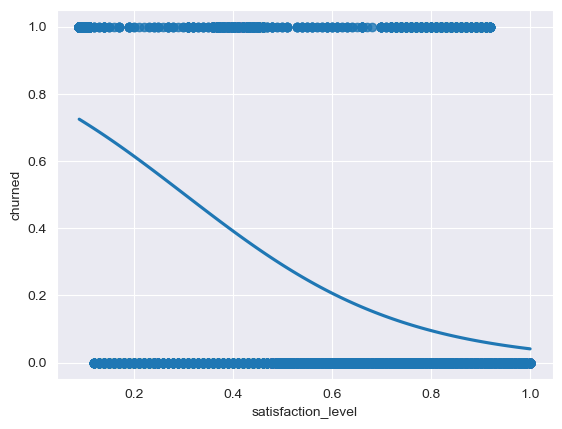

In [106]:
sns.regplot(data=df_subset, x='satisfaction_level' , y='churned', logistic=True, ci=None)

In [107]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [110]:
clf.predict_proba(X_test)

array([[0.96412836, 0.03587164],
       [0.04367662, 0.95632338],
       [0.95650037, 0.04349963],
       ...,
       [0.90374122, 0.09625878],
       [0.98865933, 0.01134067],
       [0.30718834, 0.69281166]])

## Analyze the results

In [112]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.838776
Precision: 0.678571
Recall: 0.623329
F1 Score: 0.649778


## Let's take a look at a Confusion Matrix to visualize the errors of the Logisitic Regression Model

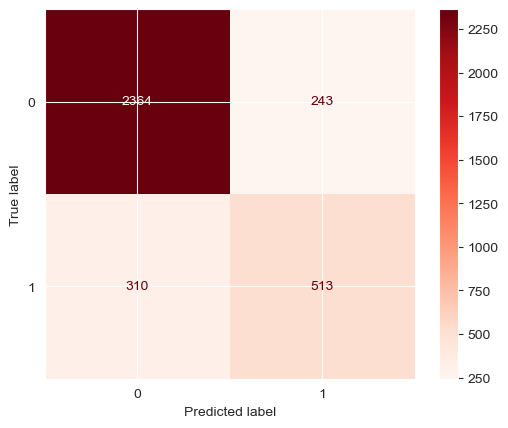

In [120]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Reds')

Examining the confusion matrix of errors, we can see how well the model performed with predictions:
* True Negatives = 2364, 69%
* True Positives = 513, 15%
* False Positives = 243, 7%
* False Negatives = 310, 9%

## Random Forest Model

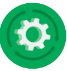
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]